In [1]:
import os
import sys
# Root folder
sys.path.append("../..")

from PIL import Image

from apis.detectors import OWLViT

from utils.image_utils import visualize_image

/home/kaixin/anaconda3/envs/dom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
detector = OWLViT()

## Test detection

In [5]:
file_path = "../assets/images/fake_bowl.png"
# Example text queries
text_queries = ['keyboard', 'tape', 'phone', 'mouse', 'bowl']

image = Image.open(file_path)
det_data = detector.detect_objects(
    image=image,
    text_queries=text_queries,
    bbox_score_top_k=20,
    bbox_conf_threshold=0.2
)

# Iterate and print each value
for i, item in enumerate(det_data):
    print(f"--- Detection {i + 1} ---")
    print(f"Box Name: {item['box_name']}")
    print(f"Score: {item['score']}")
    print(f"Box Coordinates: {item['bbox']}")

--- Detection 1 ---
Box Name: bowl
Score: 0.5499720573425293
Box Coordinates: [0.8161238431930542, 0.22018016874790192, 0.9851109981536865, 0.43317607045173645]
--- Detection 2 ---
Box Name: bowl
Score: 0.3258146345615387
Box Coordinates: [0.14777694642543793, 0.33371439576148987, 0.3123178780078888, 0.5437313914299011]
--- Detection 3 ---
Box Name: bowl
Score: 0.46486151218414307
Box Coordinates: [0.5180988907814026, 0.454830139875412, 0.6796287298202515, 0.6685799956321716]
--- Detection 4 ---
Box Name: bowl
Score: 0.34728989005088806
Box Coordinates: [0.14808475971221924, 0.5671634078025818, 0.31218186020851135, 0.7795522809028625]


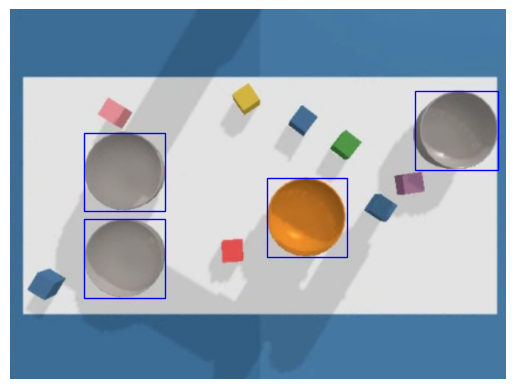

In [6]:
visualize_image(image, bboxes=[obj["bbox"] for obj in det_data])

--- Detection 1 ---
Box Name: can
Score: 0.6523089408874512
Box Coordinates: [0.12857921421527863, 0.27583634853363037, 0.22930410504341125, 0.43768739700317383]
--- Detection 2 ---
Box Name: can
Score: 0.6219409108161926
Box Coordinates: [0.22807633876800537, 0.31428998708724976, 0.30906322598457336, 0.45972490310668945]


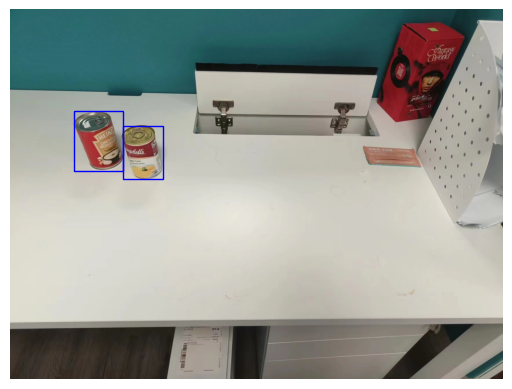

In [11]:
file_path = "../assets/images/table_and_cans/upper_left.jpg"
# Example text queries
text_queries = ['can']

image = Image.open(file_path)
det_data = detector.detect_objects(
    image=image,
    text_queries=text_queries,
    bbox_score_top_k=20,
    bbox_conf_threshold=0.2
)

# Iterate and print each value
for i, item in enumerate(det_data):
    print(f"--- Detection {i + 1} ---")
    print(f"Box Name: {item['box_name']}")
    print(f"Score: {item['score']}")
    print(f"Box Coordinates: {item['bbox']}")

visualize_image(image, bboxes=[obj["bbox"] for obj in det_data])

In [ ]:
image = Image.open("../assets/images/clean_table.jpg")
query_image = Image.open("../assets/images/cup.jpg")

match_det_data = detector.match_by_image(
    image=image,
    query_image=query_image,
    match_threshold=0.8,
    nms_threshold=0.75
)

# Iterate and print each value
for i, item in enumerate(match_det_data):
    print(f"--- Detection {i + 1} ---")
    print(f"Score: {item['score']}")
    print(f"Box Coordinates: {item['bbox']}")

--- Detection 1 ---
Score: 0.9999988675117493
Box Coordinates: [0.3052884638309479, 0.6740645170211792, 0.4977305233478546, 0.9968715906143188]


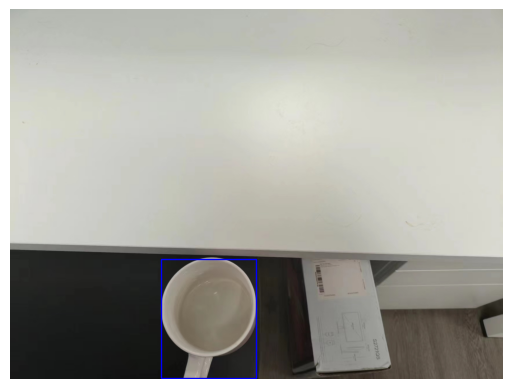

In [ ]:
visualize_image(image, bboxes=[obj["bbox"] for obj in match_det_data])